In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt

from sim_utils import *
from simulation import *

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### logisticnormal X sage

In [2]:
num_topics = 20
num_simulations = 10
doc_args = {"num_covs":2, "min_words": 50,"max_words": 100,"num_docs": 5000,"voc_size": 1000}

s = Simulator(model_type="gtm",num_topics=num_topics,num_silulations=num_simulations)
s.generate_docs(is_output=True,doc_topic_prior="logistic_normal",decoder_type="sage",doc_args=doc_args)
s.estimate_distributions(is_output=True,doc_topic_prior="logistic_normal",decoder_type="sage",model_args={"num_epochs": 1, "update_prior": True})

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:53: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_pro_raw = np.random.multivariate_normal(
  0%|          | 0/10 [00:00<?, ?it/s]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 10%|█         | 1/10 [00:19<02:54, 19.43s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 20%|██        | 2/10 [00:39<02:37, 19.74s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 30%|███       | 3/10 [00:58<02:15, 19.32s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 40%|████      | 4/10 [01:17<01:55, 19.25s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 50%|█████     | 5/10 [01:36<01:36, 19.34s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 60%|██████    | 6/10 [02:02<01:26, 21.62s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 70%|███████   | 7/10 [02:42<01:22, 27.36s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 80%|████████  | 8/10 [03:06<00:53, 26.52s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


 90%|█████████ | 9/10 [03:29<00:25, 25.21s/it]

Epoch   1	Iter   10	Loss:523.5545654	Rec Loss:516.5330200	MMD:7.0215116	Sparsity_Loss:0.0000374	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:537.5532514	Rec Loss:524.3802849	MMD:13.1729341	Sparsity_Loss:0.0000680	Pred_Loss:0.0000000


100%|██████████| 10/10 [03:50<00:00, 23.08s/it]


### matching the topic between two matrices (true and estimated) by Hungarian algorithm
1. the column of doc-topic matrix (by cossim, correlation, or dot_product)
2. the row of topic-word matrix (by top10 keyword)

In [3]:
# by dot product
dp_corres_num_topic_dict = matching_topic(
    model_type="gtm", score_method="dot_product", num_simulations=num_simulations,
    doc_topic_prior="logistic_normal",decoder_type="sage"
)
# by cosine similarity
cs_corres_num_topic_dict = matching_topic(
    model_type="gtm", score_method="cossim", num_simulations=num_simulations,
    doc_topic_prior="logistic_normal",decoder_type="sage"
)
# by correlation coefficient
cc_corres_num_topic_dict = matching_topic(
    model_type="gtm", score_method="correlation", num_simulations=num_simulations,
    doc_topic_prior="dirichlet",decoder_type="sage"
)

### drawing the topic model performance
- by cosine similarity
- by correlation coefficient
- by top10 keywords

#### by cosine similarity

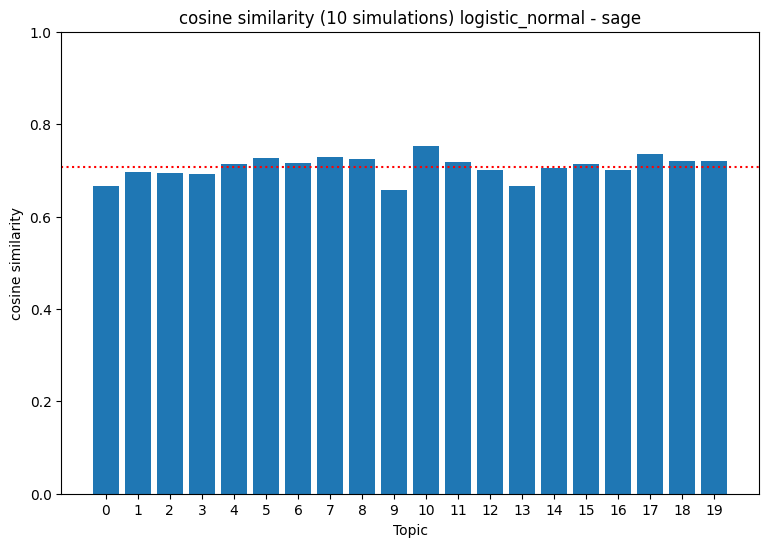

In [10]:
model_type = "gtm"
score_type = "cossim"
doc_topic_prior= "logistic_normal"
decoder_type ="sage"

df_cossim = calculate_score(
    model_type=model_type,
    score_type=score_type,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior=doc_topic_prior,decoder_type=decoder_type,)

fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
cossim_mean = df_cossim.mean()
cossim_var = df_cossim.var()
ax.bar(x, cossim_mean, yerr=cossim_var)
ax.axhline(cossim_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("cosine similarity")
ax.set_title("cosine similarity ({} simulations) {} - {}".format(num_simulations,doc_topic_prior,decoder_type))
plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,doc_topic_prior,decoder_type))
plt.show()

#### by correlation coefficient

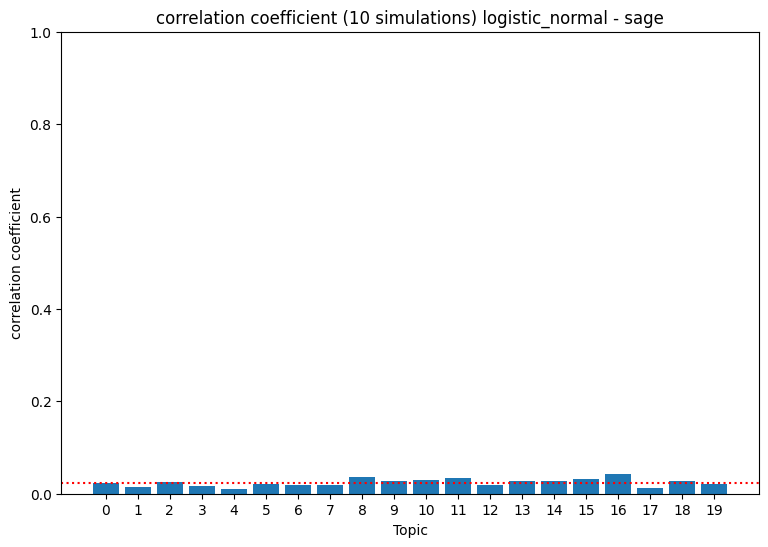

In [11]:
model_type = "gtm"
score_type = "correlation"
doc_topic_prior= "logistic_normal"
decoder_type ="sage"

df_cossim = calculate_score(
    model_type=model_type,
    score_type=score_type,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior=doc_topic_prior,decoder_type=decoder_type,)

fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
cossim_mean = df_cossim.mean()
cossim_var = df_cossim.var()
ax.bar(x, cossim_mean, yerr=cossim_var)
ax.axhline(cossim_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("correlation coefficient")
ax.set_title("correlation coefficient ({} simulations) {} - {}".format(num_simulations,doc_topic_prior,decoder_type))
plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,doc_topic_prior,decoder_type))
plt.show()

#### keywords

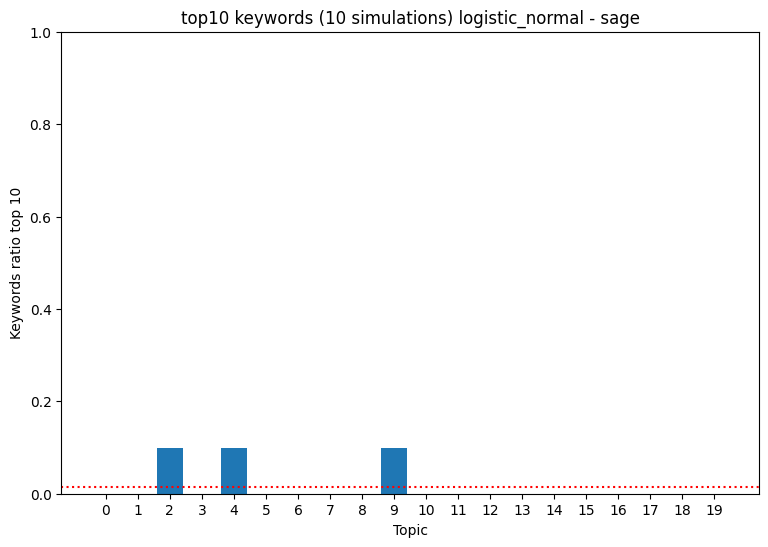

In [16]:
model_type = "gtm"
score_type = "keywords"
doc_topic_prior= "logistic_normal"
decoder_type ="sage"

df_cossim = calculate_score(
    model_type=model_type,
    score_type=score_type,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior=doc_topic_prior,decoder_type=decoder_type,)

fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
cossim_mean = df_cossim.mean()
cossim_var = df_cossim.var()
ax.bar(x, cossim_mean, yerr=cossim_var)
ax.axhline(cossim_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Keywords ratio top 10")
ax.set_title("top10 keywords ({} simulations) {} - {}".format(num_simulations,doc_topic_prior,decoder_type))
plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,doc_topic_prior,decoder_type))
plt.show()

#### Euclid distance

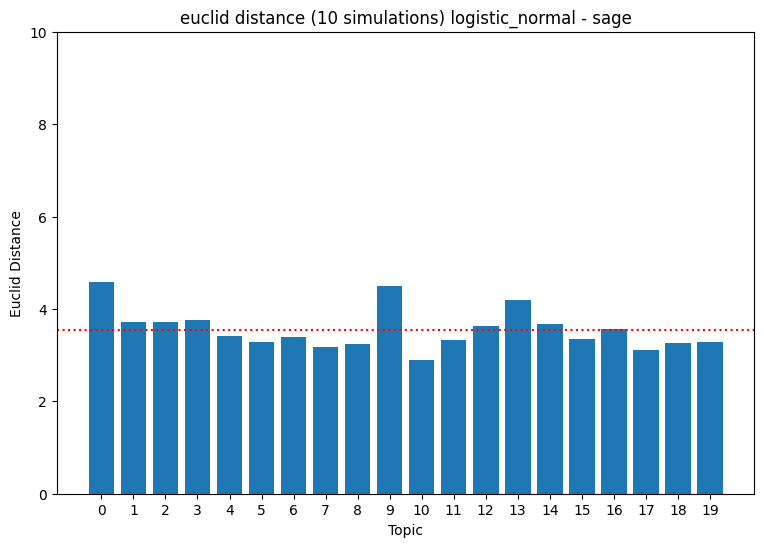

In [19]:
model_type = "gtm"
score_type = "euclid"
doc_topic_prior= "logistic_normal"
decoder_type ="sage"

df_cossim = calculate_score(
    model_type=model_type,
    score_type=score_type,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior=doc_topic_prior,decoder_type=decoder_type,)

fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
cossim_mean = df_cossim.mean()
cossim_var = df_cossim.var()
ax.bar(x, cossim_mean, yerr=cossim_var)
ax.axhline(cossim_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 10)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Euclid Distance")
ax.set_title("euclid distance ({} simulations) {} - {}".format(num_simulations,doc_topic_prior,decoder_type))
plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,doc_topic_prior,decoder_type))
plt.show()